#Importar Librerías

In [1]:
import pandas as pd 
import numpy as np
import glob, os

Conectar con Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dar Estilo a las visualizaciones de los DataFrame como tablas de Google

In [3]:
%load_ext google.colab.data_table

# Datos de Anemia en Perú - SIEN (Sistema de Información del Estado Nutricional)

* url: https://www.datosabiertos.gob.pe/dataset/poblaci%C3%B3n-peru
* fuente: Instituto Nacional de Salud
* Fecha Lanzamiento: Resultados 2020

Al descargar los datos se obtiene un ZIP con carpetas para la evaluacion de Desnutrición y Anemia. En este notebook se toman sólo los datos de anemia los cuales están separados en 29 archivos csv (1 por cada departamento, a excepción de Lima que cuenta con 4 archivos)

## Importación de los datos

Se establece la ruta de la cual se leerán los archivos. En este caso, desde una carpeta de Google Drive

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/SIEN_Hemoglobina/'
os.chdir(path)

Se obtienen todos los nombres de archivo con extensión .csv

In [5]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

El siguiente método lee cada archivo .csv, los convierte en un DataFrame y los almacena en un conjunto de DataFrames.

Se intenta leer cada archivo con la codificación utf-8 en caso no sea posible se intenta con la codificación latin-1

In [6]:
i=1
combined_csv=[]
for f in all_filenames:
  r=''
  df = pd.DataFrame()
  try:
    df = pd.read_csv(f, encoding = 'utf-8')
    r='utf-8 - ok'
  #except ValueError:
  except:
    try:
      df = pd.read_csv(f, encoding = 'latin-1')
      r='latin-1 - ok'
    except:
      r='error'
  print(i,'.-',f,'-------',r)
  i+=1
  if len(df) > 0:
    combined_csv.append(df)

1 .- ANCASH.csv ------- utf-8 - ok
2 .- APURIMAC.csv ------- utf-8 - ok
3 .- AREQUIPA.csv ------- utf-8 - ok
4 .- AYACUCHO.csv ------- utf-8 - ok
5 .- CAJAMARCA.csv ------- utf-8 - ok
6 .- CALLAO.csv ------- utf-8 - ok
7 .- CUSCO.csv ------- utf-8 - ok
8 .- HUANCAVELICA.csv ------- utf-8 - ok
9 .- AMAZONAS.csv ------- utf-8 - ok
10 .- UCAYALI.csv ------- utf-8 - ok
11 .- TUMBES.csv ------- utf-8 - ok
12 .- TACNA.csv ------- utf-8 - ok
13 .- SAN MARTIN.csv ------- utf-8 - ok
14 .- PUNO.csv ------- utf-8 - ok
15 .- PIURA.csv ------- utf-8 - ok
16 .- PASCO.csv ------- utf-8 - ok
17 .- MOQUEGUA.csv ------- utf-8 - ok
18 .- MADRE DE DIOS.csv ------- utf-8 - ok
19 .- LORETO.csv ------- utf-8 - ok
20 .- LIMA DIRIS SUR.csv ------- utf-8 - ok
21 .- LIMA.csv ------- utf-8 - ok
22 .- LIMA DIRIS NORTE.csv ------- utf-8 - ok
23 .- LIMA DIRIS ESTE.csv ------- utf-8 - ok
24 .- LIMA DIRIS CENTRO.csv ------- utf-8 - ok
25 .- LAMBAYEQUE.csv ------- utf-8 - ok
26 .- LA LIBERTAD.csv ------- utf-8 - ok
27 

**Sólo HUANUCO se lee con codificación latin-1**

Se consolida todos los dataframes en 1 solo

In [7]:
combined_csv = pd.concat([f for f in combined_csv])

In [8]:
combined_csv.columns

Index(['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS',
       'Dist_EESS', 'Renipress', 'FechaAtencion', 'Sexo', 'FechaNacimiento',
       'EdadMeses', 'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN',
       'CentroPobladoPN', 'Juntos', 'SIS', 'Pin', 'Qaliwarma', 'Peso', 'Talla',
       'Hemoglobina', 'FechaHemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN',
       'DistritoREN', 'AlturaREN', 'HBC', 'Dx_Anemia', 'ï»¿Diresa'],
      dtype='object')

Se detectan errores en los nombres de distritos y provincias de HUANUCO. (Ej. BAÃ\x91OS, PUÃ\x91OS')

In [9]:
field = 'DistritoREN'
print([d for d in combined_csv[combined_csv['Dpto_EESS']=='HUANUCO'].sort_values(by=field)[field].unique()] )

['AMARILIS', 'AMBO', 'APARICIO POMARES', 'ARANCAY', 'BAÃ\x91OS', 'CAHUAC', 'CANCHABAMBA', 'CASTILLO GRANDE', 'CAYNA', 'CHACABAMBA', 'CHAGLLA', 'CHAVIN DE PARIARCA', 'CHAVINILLO', 'CHINCHAO', 'CHOLON', 'CHORAS', 'CHUQUIS', 'CHURUBAMBA', 'COCHABAMBA', 'CODO DEL POZUZO', 'COLPAS', 'CONCHAMARCA', 'DANIEL ALOMIA ROBLES', 'HERMILIO VALDIZAN', 'HONORIA', 'HUACAR', 'HUACAYBAMBA', 'HUACRACHUCO', 'HUANUCO', 'JACAS CHICO', 'JACAS GRANDE', 'JESUS', 'JIRCAN', 'JIVIA', 'JOSE CRESPO Y CASTILLO', 'LA MORADA', 'LA UNION', 'LLATA', 'LUYANDO', 'MARGOS', 'MARIANO DAMASO BERAUN', 'MARIAS', 'MIRAFLORES', 'MOLINO', 'MONZON', 'OBAS', 'PACHAS', 'PAMPAMARCA', 'PANAO', 'PILLCO MARCA', 'PINRA', 'PUCAYACU', 'PUEBLO NUEVO', 'PUERTO INCA', 'PUNCHAO', 'PUÃ\x91OS', 'QUISQUI', 'QUIVILLA', 'RIPAN', 'RONDOS', 'RUPA-RUPA', 'SAN BUENAVENTURA', 'SAN FRANCISCO', 'SAN FRANCISCO DE ASIS', 'SAN FRANCISCO DE CAYRAN', 'SAN MIGUEL DE CAURI', 'SAN PABLO DE PILLAO', 'SAN PEDRO DE CHAULAN', 'SAN RAFAEL', 'SANTA MARIA DEL VALLE', 'SAN

Estos errores se pueden corregir reemplazando las cadenas de texto con las siguientes líneas de código

In [10]:
# combined_csv = combined_csv.replace(r'Ã\x91', 'Ñ', regex=True)
# combined_csv = combined_csv.replace(r'Ã\x83â\x80\x98', 'Ñ', regex=True)
# combined_csv = combined_csv.replace(r'Ã\x90', 'Ñ', regex=True)
# combined_csv = combined_csv.replace(r'Ã\x83Æ\x92Ã¢â\x82¬Ë\x9c', 'Ñ', regex=True)

Sin embargo, dado que este proceso toma algo de tiempo y que se importará una tabla de ubigeos de la cual se pueden obtener estos datos con nomenclaturas correctas, estos campos no se tomarán en cuenta

In [11]:
combined_csv.head(5)

,Diresa,Red,Microred,EESS,Dpto_EESS,Prov_EESS,Dist_EESS,Renipress,FechaAtencion,Sexo,...,Consejeria,Sesion,UbigeoREN,DepartamentoREN,ProvinciaREN,DistritoREN,AlturaREN,HBC,Dx_Anemia,ï»¿Diresa
0,ANCASH,HUAYLAS SUR,CHIQUIAN,I-1 - 00001498 - PUESTO DE SALUD QUERO,ANCASH,BOLOGNESI,HUASTA,1498,11/21/2020,M,...,0,0,20509,ANCASH,BOLOGNESI,HUASTA,3385,10.112294,Anemia Leve,NaN
1,ANCASH,CONCHUCOS SUR,SAN MARCOS,I-1 - 00025623 - PUESTO DE SALUD AYASH DE HU...,ANCASH,HUARI,SAN MARCOS,25623,10/5/2020,M,...,0,0,21014,ANCASH,HUARI,SAN MARCOS,2964,12.308217,Normal,NaN
2,ANCASH,CONCHUCOS SUR,SAN MARCOS,I-1 - 00025623 - PUESTO DE SALUD AYASH DE HU...,ANCASH,HUARI,SAN MARCOS,25623,10/16/2020,M,...,0,0,21014,ANCASH,HUARI,SAN MARCOS,2964,12.008217,Normal,NaN
3,ANCASH,CONCHUCOS SUR,SAN MARCOS,I-1 - 00025623 - PUESTO DE SALUD AYASH DE HU...,ANCASH,HUARI,SAN MARCOS,25623,11/29/2020,M,...,0,0,21014,ANCASH,HUARI,SAN MARCOS,2964,12.208217,Normal,NaN
4,ANCASH,HUAYLAS SUR,HUARUPAMPA,I-3 - 00001562 - CENTRO DE SALUD HUARUPAMPA,ANCASH,HUARAZ,HUARAZ,1562,11/8/2020,M,...,1,0,20101,ANCASH,HUARAZ,HUARAZ,3052,9.890674,Anemia Moderada,NaN


In [12]:
combined_csv.Dx_Anemia.value_counts()

Normal             420197
Anemia Leve        102457
Anemia Moderada     54578
Anemia Severa        1344
Name: Dx_Anemia, dtype: int64

## Validar Nulos

In [13]:
def Nulls_By_Var(df_):
  return pd.DataFrame([(c,df_[c].isnull().sum(),'{:.2f}%'.format(df_[c].isnull().sum()/df_.shape[0]*100)) for c in df_.columns if df_[c].isnull().sum() > 0],
             columns={'Variable','Nulos','% Nulos'})

In [14]:
Nulls_By_Var(combined_csv)

,Nulos,Variable,% Nulos
0,Diresa,18402,3.18%
1,ï»¿Diresa,560174,96.82%


Se encontró campos con valores nulos que no se detectan como tal

In [15]:
combined_csv['DepartamentoPN'].value_counts

<bound method IndexOpsMixin.value_counts of 0               
1               
2               
3               
4         ANCASH
          ...   
18397    HUANUCO
18398    HUANUCO
18399    HUANUCO
18400     LORETO
18401    HUANUCO
Name: DepartamentoPN, Length: 578576, dtype: object>

Se reemplazan dichos valores por nan

In [16]:
combined_csv =combined_csv.replace(r'^\s*$', np.nan, regex=True)

In [17]:
Nulls_By_Var(combined_csv)

,Nulos,Variable,% Nulos
0,Diresa,18402,3.18%
1,UbigeoPN,21536,3.72%
2,DepartamentoPN,21536,3.72%
3,ProvinciaPN,21536,3.72%
4,DistritoPN,21536,3.72%
5,CentroPobladoPN,21536,3.72%
6,Juntos,21536,3.72%
7,SIS,21536,3.72%
8,Pin,21536,3.72%
9,Qaliwarma,21536,3.72%


Se encuentra que los campos Peso, Talla, FechaHemoglobina y ï»¿Diresa tienen muchos valores faltantes por lo que se omitirán en el estudio

**Nulos en DepartamentoPN por Departamento del establecimiento de Salud**

In [18]:
combined_csv['DepartamentoPN'].isnull().groupby(combined_csv['Dpto_EESS']).sum().astype(int).reset_index(name='count')

,Dpto_EESS,count
0,AMAZONAS,231
1,ANCASH,1045
2,APURIMAC,400
3,AREQUIPA,505
4,AYACUCHO,790
5,CAJAMARCA,791
6,CALLAO,573
7,CUSCO,685
8,HUANCAVELICA,273
9,HUANUCO,548


**Cantidad de Registros, cantidad de nulos y % de nulos en el Departamento de la Persona Natural según Departamento del Establecimiento de Salud**

In [19]:
nulls_freq = combined_csv[['DepartamentoPN','Dpto_EESS', 'Dist_EESS']].groupby(['Dpto_EESS']).agg(
    {'Dist_EESS':'count', 'DepartamentoPN': lambda x: x.isnull().sum()}).reset_index().rename(
        {'Dist_EESS':'count', 'DepartamentoPN':'nulls'}, axis=1)    
nulls_freq['%'] = round(nulls_freq['nulls']/nulls_freq['count']*100,2)
nulls_freq= nulls_freq.sort_values(by='%', ascending=True)
nulls_freq

,Dpto_EESS,count,nulls,%
19,PIURA,51879,915,1.76
5,CAJAMARCA,33520,791,2.36
10,ICA,17323,414,2.39
7,CUSCO,26562,685,2.58
22,TACNA,5888,156,2.65
3,AREQUIPA,18352,505,2.75
0,AMAZONAS,8016,231,2.88
2,APURIMAC,13656,400,2.93
23,TUMBES,6460,191,2.96
24,UCAYALI,9212,273,2.96


Se validad que no hay provincias con una cantidad relativamente importante de nulos en este campo.

In [20]:
import matplotlib.pyplot as plt

<BarContainer object of 25 artists>

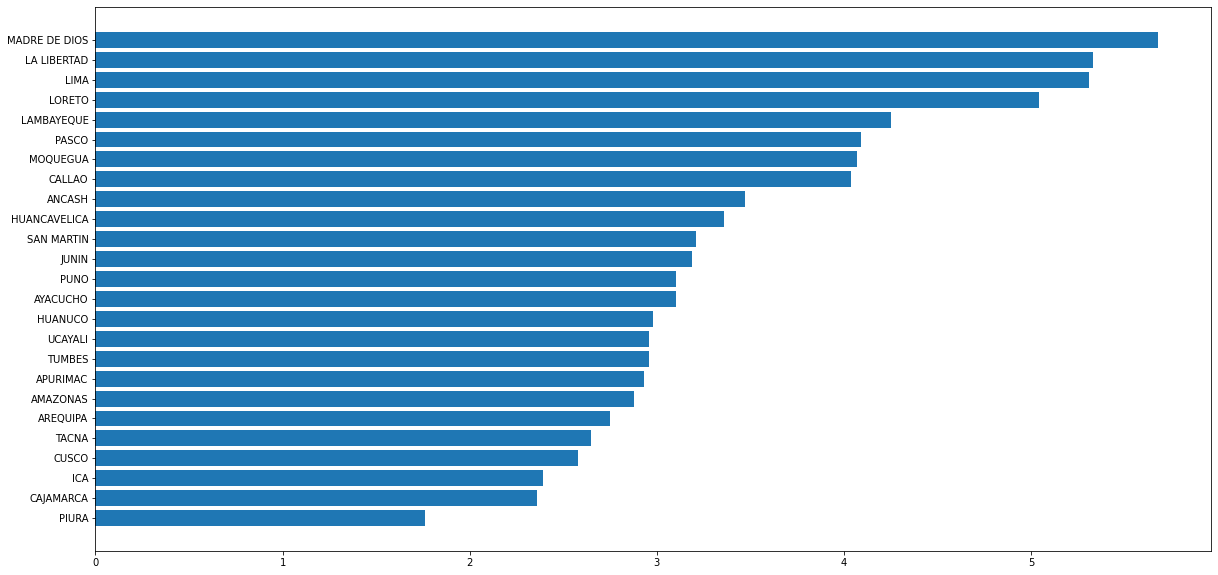

In [21]:
plt.figure(figsize=(20,10))
plt.barh(nulls_freq['Dpto_EESS'],nulls_freq['%'])

## Crear tabla con data de establecimientos de salud

Se validó que el campo 'Renipress' es un valor único por cada EESS por lo que se procede a retirar los campos: 'Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS','Dist_EESS'; ya que no aportarán valor al análisis

In [22]:
est_salud = combined_csv[['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS','Dist_EESS', 'Renipress', 'Dx_Anemia']].groupby(['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS','Dist_EESS', 'Renipress']).agg({'Dx_Anemia':'count'}).reset_index().rename(columns={'Dx_Anemia':'count'})
est_salud.drop(['count'],axis=1, inplace=True)
est_salud.head(10)

,Diresa,Red,Microred,EESS,Dpto_EESS,Prov_EESS,Dist_EESS,Renipress
0,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00005054 - MIRAFLORES DE ARAMANGO,AMAZONAS,BAGUA,ARAMANGO,5054
1,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00005061 - SHAIM,AMAZONAS,BAGUA,ARAMANGO,5061
2,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00007008 - CHINGANZA,AMAZONAS,BAGUA,ARAMANGO,7008
3,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00007009 - MONTENEGRO,AMAZONAS,BAGUA,ARAMANGO,7009
4,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00007228 - NAJEM,AMAZONAS,BAGUA,ARAMANGO,7228
5,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00007263 - GUAYAQUIL,AMAZONAS,BAGUA,ARAMANGO,7263
6,AMAZONAS,BAGUA,ARAMANGO,I-1 - 00007264 - EL CEDRON,AMAZONAS,BAGUA,ARAMANGO,7264
7,AMAZONAS,BAGUA,ARAMANGO,I-2 - 00005058 - NUMPARKET,AMAZONAS,BAGUA,ARAMANGO,5058
8,AMAZONAS,BAGUA,ARAMANGO,I-2 - 00005059 - TUTUMBEROS,AMAZONAS,BAGUA,ARAMANGO,5059
9,AMAZONAS,BAGUA,ARAMANGO,I-3 - 00005053 - ARAMANGO,AMAZONAS,BAGUA,ARAMANGO,5053


In [23]:
est_salud.groupby('Renipress').agg({'Diresa':'count'}).reset_index().rename(columns={'Diresa':'count'}).sort_values(by=['count'], ascending = False).head(10)

,Renipress,count
0,3,1
4845,5612,1
4815,5578,1
4814,5577,1
4813,5576,1
4812,5575,1
4811,5574,1
4810,5571,1
4809,5569,1
4808,5568,1


**Exportar los datos**

In [24]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/'#Guardar el DataSet en la carpeta ../Data
os.chdir(path)

In [25]:
est_salud.to_csv('EESS_utf8.csv', index=False, encoding='utf-8-sig')

## Seleccion de Variables

Por tener muchos elementos vacíos se retiran los campos:
*   ï»¿Diresa': Parece un error de la data
* 'FechaNacimiento': Ya que se cuenta con la edad en meses
* 'FechaHemoglobina': casi 50% sin datos
* 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN', 'CentroPobladoPN': Se tomarán valores (limpios) de la tabla ubigeo, de este grupo se conserva el campo UbigeoPN
* 'DepartamentoREN', 'ProvinciaREN', 'DistritoREN': Se tomarán valores (limpios) de la tabla ubigeo, de este grupo se conserva el campo UbigeoREN
* 'Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS','Dist_EESS': sólo se mantendrá 'Renipress'

In [26]:
combined_csv.columns

Index(['Diresa', 'Red', 'Microred', 'EESS', 'Dpto_EESS', 'Prov_EESS',
       'Dist_EESS', 'Renipress', 'FechaAtencion', 'Sexo', 'FechaNacimiento',
       'EdadMeses', 'UbigeoPN', 'DepartamentoPN', 'ProvinciaPN', 'DistritoPN',
       'CentroPobladoPN', 'Juntos', 'SIS', 'Pin', 'Qaliwarma', 'Peso', 'Talla',
       'Hemoglobina', 'FechaHemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'DepartamentoREN', 'ProvinciaREN',
       'DistritoREN', 'AlturaREN', 'HBC', 'Dx_Anemia', 'ï»¿Diresa'],
      dtype='object')

In [27]:
combined_csv = combined_csv[['Renipress', 'FechaAtencion', 'Sexo', 
       'EdadMeses', 'UbigeoPN', 'Juntos', 'SIS', 'Pin', 'Qaliwarma', 
       'Hemoglobina','Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN','HBC', 'Dx_Anemia']]

## Eliminar Nulos
Ya habiendo seleccionado las variables se procede a eliminar nulos

In [28]:
Nulls_By_Var(combined_csv)

,Nulos,Variable,% Nulos
0,UbigeoPN,21536,3.72%
1,Juntos,21536,3.72%
2,SIS,21536,3.72%
3,Pin,21536,3.72%
4,Qaliwarma,21536,3.72%


In [29]:
orig = combined_csv.shape[0]
combined_csv.dropna(inplace=True)
final = combined_csv.shape[0]

In [30]:
print('Cantidad de datos original {},'.format(orig))
print('Cantidad de datos final {},'.format(final))
print('% de datos eliminados {:.2f}%'.format((orig-final)/orig*100))

Cantidad de datos original 578576,
Cantidad de datos final 557040,
% de datos eliminados 3.72%


## Validar tipos de datos

In [31]:
combined_csv.dtypes

Renipress           int64
FechaAtencion      object
Sexo               object
EdadMeses           int64
UbigeoPN           object
Juntos             object
SIS                object
Pin                object
Qaliwarma          object
Hemoglobina       float64
Cred                int64
Suplementacion      int64
Consejeria          int64
Sesion              int64
UbigeoREN           int64
HBC               float64
Dx_Anemia          object
dtype: object

Se convierte el Ubigeo en un dato de tipo Float

In [32]:
combined_csv.UbigeoPN = combined_csv.UbigeoPN.astype('float64')
combined_csv.UbigeoREN = combined_csv.UbigeoREN.astype('float64')
combined_csv.dtypes

Renipress           int64
FechaAtencion      object
Sexo               object
EdadMeses           int64
UbigeoPN          float64
Juntos             object
SIS                object
Pin                object
Qaliwarma          object
Hemoglobina       float64
Cred                int64
Suplementacion      int64
Consejeria          int64
Sesion              int64
UbigeoREN         float64
HBC               float64
Dx_Anemia          object
dtype: object

## Exportar Datos

Antes de Exportar se reduce el tamaño del DataSet agrupando todos los datos posibles. Para ello se agrega la variable temporal counter

In [58]:
combined_csv['counter'] = 1

In [59]:
combined_csv.columns

Index(['Renipress', 'FechaAtencion', 'Sexo', 'EdadMeses', 'UbigeoPN', 'Juntos',
       'SIS', 'Pin', 'Qaliwarma', 'Hemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'HBC', 'Dx_Anemia', 'counter'],
      dtype='object')

In [60]:
combined_lite = combined_csv.groupby(['Renipress', 'FechaAtencion', 'Sexo', 'EdadMeses', 'UbigeoPN', 'Juntos',
       'SIS', 'Pin', 'Qaliwarma', 'Hemoglobina', 'Cred', 'Suplementacion',
       'Consejeria', 'Sesion', 'UbigeoREN', 'HBC', 'Dx_Anemia']).agg({'counter':'count'}).reset_index()

In [61]:
print('El dataset original cuenta con {} registros'.format(combined_csv.shape[0]))
print('El dataset lite cuenta con {} registros'.format(combined_lite.shape[0]))
combined_lite.head()

El dataset original cuenta con 557040 registros
El dataset lite cuenta con 556045 registros


,Renipress,FechaAtencion,Sexo,EdadMeses,UbigeoPN,Juntos,SIS,Pin,Qaliwarma,Hemoglobina,Cred,Suplementacion,Consejeria,Sesion,UbigeoREN,HBC,Dx_Anemia,counter
0,3,1/10/2020,F,42,160108.0,0,1,0,0,12.5,1,0,0,0,160108.0,12.508447,Normal,1
1,3,1/10/2020,F,45,160108.0,0,1,0,0,11.4,1,1,1,0,160108.0,11.408447,Normal,1
2,3,1/14/2020,F,18,160108.0,0,1,0,0,10.2,1,1,1,0,160108.0,10.208447,Anemia Leve,1
3,3,1/14/2020,F,40,150133.0,0,1,0,0,11.6,1,1,1,0,160108.0,11.608447,Normal,1
4,3,1/14/2020,F,50,160101.0,0,1,0,0,12.5,1,1,0,0,160108.0,12.508447,Normal,1


Se procede a exportar los datos

In [62]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/'#Guardar el DataSet en la carpeta ../Data
os.chdir(path)

In [63]:
combined_lite.to_csv( "combined_HB_Lite.csv", index=False, encoding='utf-8-sig')

#Importar data Ubigeo (Distrital)
* url: https://www.datosabiertos.gob.pe/dataset/codigos-equivalentes-de-ubigeo-del-peru
* Fuente: Ministerio de Salud
* Fecha Lanzamiento: 2021-08-13

In [33]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/'
filename = 'TB_UBIGEOS'
ubg = pd.read_csv(path + filename + '.csv')
ubg.columns

Index(['id_ubigeo', 'ubigeo_reniec', 'ubigeo_inei', 'departamento_inei',
       'departamento', 'provincia_inei', 'provincia', 'distrito', 'region',
       'macroregion_inei', 'macroregion_minsa', 'iso_3166_2', 'fips',
       'superficie', 'altitud', 'latitud', 'longitud'],
      dtype='object')

In [34]:
ubg = ubg[['ubigeo_inei', 'departamento', 'provincia', 'distrito', 'region',
       'macroregion_inei', 'altitud', 'latitud', 'longitud']]

## Validar nulos

In [35]:
Nulls_By_Var(ubg)

,Nulos,Variable,% Nulos
0,ubigeo_inei,1,0.05%
1,altitud,19,1.00%
2,latitud,19,1.00%
3,longitud,19,1.00%


Se omite el dato que no cuenta con ubigeo ya que se utilizará para llevar la data a la tabla combined

In [36]:
ubg = ubg[ubg['ubigeo_inei'].isnull() == False]

In [37]:
ubg.head()

,ubigeo_inei,departamento,provincia,distrito,region,macroregion_inei,altitud,latitud,longitud
0,10101.0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,2338.0,-6.2294,-77.8728
1,10102.0,AMAZONAS,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,2823.0,-6.0325,-77.7108
2,10103.0,AMAZONAS,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,859.0,-6.8358,-78.0197
3,10104.0,AMAZONAS,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,2143.0,-6.2556,-77.7008
4,10105.0,AMAZONAS,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,2677.0,-6.0783,-77.7375


## Validar Tipos de Dato

In [55]:
ubg.dtypes

ubigeo_inei         float64
departamento         object
provincia            object
distrito             object
region               object
macroregion_inei     object
altitud             float64
latitud             float64
longitud            float64
dtype: object

## Exportar datos

In [38]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/'#Guardar el DataSet en la carpeta ../Data
os.chdir(path)

In [39]:
ubg.to_csv( filename + '_utf8_.csv', index=False, encoding='utf-8-sig')

#Importar data Población
* url: https://www.datosabiertos.gob.pe/dataset/poblaci%C3%B3n-peru
* Fuente: Ministerio de Salud
* Fecha Lanzamiento: 2021-08-17

Se obtiene un dataframe de la población 0 a 5 años por ubigeo y sexo

In [40]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/'
filename = 'TB_POBLACION_INEI'
pop = pd.read_csv(path + filename + '.csv')

In [41]:
pop.columns

Index(['ubigeo_reniec', 'ubigeo_inei', 'Departamento', 'Provincia', 'Distrito',
       'Edad_Anio', 'Sexo', 'Cantidad'],
      dtype='object')

Generar una nueva variable conteniendo la población de 0 a 5 años

In [42]:
rango = [str(n) for n in range(6)]
print(rango) # 0 a 5 años

['0', '1', '2', '3', '4', '5']


In [43]:
pop['pob. 0 a 5 años'] = [pop['Cantidad'].loc[i] if pop['Edad_Anio'].loc[i] in rango else 0 for i in range(pop.shape[0])]

In [44]:
#pop = pop[pop['Edad_Anio'].isin([str(n) for n in range(6)])][['ubigeo_inei','Sexo', 'Cantidad']].groupby(['ubigeo_inei','Sexo']).agg({'Cantidad':'sum'}).rename(columns={'Cantidad':'Población'}).reset_index()
pop = pop[['ubigeo_inei','Sexo', 'Cantidad', 'pob. 0 a 5 años']].groupby(['ubigeo_inei','Sexo']).agg({'Cantidad':'sum','pob. 0 a 5 años':'sum'}).rename(columns={'Cantidad':'Población'}).reset_index()

In [45]:
pop.head()

,ubigeo_inei,Sexo,Población,pob. 0 a 5 años
0,10101,F,13734,1068
1,10101,M,15307,1078
2,10102,F,152,13
3,10102,M,139,11
4,10103,F,866,98


Sólo se tomará el dato de la población de 0 a 5 años

In [46]:
pop.drop(['Población'],axis=1,inplace=True)
pop.head()

,ubigeo_inei,Sexo,pob. 0 a 5 años
0,10101,F,1068
1,10101,M,1078
2,10102,F,13
3,10102,M,11
4,10103,F,98


In [48]:
pop = pop.rename(columns={'pob. 0 a 5 años':'Población'})
pop.head()

,ubigeo_inei,Sexo,Población
0,10101,F,1068
1,10101,M,1078
2,10102,F,13
3,10102,M,11
4,10103,F,98


In [50]:
print('Población Total {}'.format(pop['Población'].sum()))
pop.groupby(['Sexo']).agg({'Población':'sum'}).reset_index()
#3367766
#F: 1714283
#M: 1653483

Población Total 3367766


,Sexo,Población
0,F,1714283
1,M,1653483


## Validar Nulos

In [52]:
Nulls_By_Var(pop)

,Nulos,Variable,% Nulos


## Validar Tipos de Dato

In [53]:
pop.dtypes

ubigeo_inei     int64
Sexo           object
Población       int64
dtype: object

Se corrige el tipo de dato de ubigeo

In [54]:
pop['ubigeo_inei'] = pop['ubigeo_inei'].astype(float)

## Exportar datos

In [56]:
path = '/content/drive/MyDrive/Colab Notebooks/Portafolio/Data/'#Guardar el DataSet en la carpeta ../Data
os.chdir(path)

In [57]:
pop.to_csv( filename + '_utf8_.csv', index=False, encoding='utf-8-sig')

# Generación del Dahsboard
Se utiliza Tableau para generar un dashboard descriptivo de la data
* URL: https://public.tableau.com/app/profile/cesar.oporto/viz/SIEN_Anemia_2020_v2/Historia1